In [1]:
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()



In [3]:
# Re-identifying outliers for v1_mean using the updated data
# Extract the data for v1_mean
new_ldt_1_v1_mean = new_ldt_session_1_data.set_index('ID')['v1_mean']
new_ldt_2_v1_mean = new_ldt_session_2_data.set_index('ID')['v1_mean']

# Ensure only matching IDs are kept for comparison
new_common_ids = new_ldt_1_v1_mean.index.intersection(new_ldt_2_v1_mean.index)
new_paired_v1_means = pd.concat([new_ldt_1_v1_mean.loc[new_common_ids], new_ldt_2_v1_mean.loc[new_common_ids]], axis=1, keys=['Session1', 'Session2'])

# Calculate Mahalanobis distance using the safe function
new_mahalanobis_dist = safe_mahalanobis(x=new_paired_v1_means, data=new_paired_v1_means)

# Determine the threshold for p < 0.001
p_value = 0.001
new_threshold = chi2.ppf((1 - p_value), df=2)  # 2 variables, as we're looking at pairs

# Identify outliers
new_outliers = new_mahalanobis_dist > new_threshold

# Summarize the outliers
new_outlier_indices = new_paired_v1_means.index[new_outliers]
new_number_of_outliers = np.sum(new_outliers)

# Display the number of outliers and the threshold used
(new_number_of_outliers, new_outlier_indices, new_threshold)


(0, Index([], dtype='int64', name='ID'), 13.815510557964274)

In [4]:
def identify_outliers(columns, session_1_data, session_2_data, alpha=0.001):
    outlier_indices_dict = {}
    
    for col in columns:
        # Extract the data for the column
        session_1_col_data = session_1_data.set_index('ID')[col]
        session_2_col_data = session_2_data.set_index('ID')[col]

        # Ensure only matching IDs are kept for comparison
        common_ids = session_1_col_data.index.intersection(session_2_col_data.index)
        paired_col_data = pd.concat([session_1_col_data.loc[common_ids], session_2_col_data.loc[common_ids]], axis=1, keys=['Session1', 'Session2'])

        # Calculate Mahalanobis distance using the safe function
        mahalanobis_dist = safe_mahalanobis(x=paired_col_data, data=paired_col_data)

        # Determine the threshold for p < alpha
        threshold = chi2.ppf((1 - alpha), df=2)  # 2 variables, as we're looking at pairs

        # Identify outliers
        outliers = mahalanobis_dist > threshold
        outlier_indices = paired_col_data.index[outliers]
        
        # Save the indices of the outliers for each column
        outlier_indices_dict[col] = outlier_indices

    return outlier_indices_dict


columns_for_analysis = [
    'v1_mean',
    'v2_mean',
    'zr_mean',
    'a_mean',
    'ndt_mean',
    'sndt_mean',
    'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin'
]

In [5]:
# Re-identify outliers for all specified columns using the updated data
new_outliers_dict = identify_outliers(columns_for_analysis, new_ldt_session_1_data, new_ldt_session_2_data)

# Display the number of outliers for each column
new_outlier_counts = {col: len(indices) for col, indices in new_outliers_dict.items()}
new_outlier_counts


{'v1_mean': 0,
 'v2_mean': 2,
 'zr_mean': 1,
 'a_mean': 3,
 'ndt_mean': 1,
 'sndt_mean': 3,
 'alpha_mean': 3,
 'accuracy_percentage': 1,
 'mean_log_rt': 0,
 'alpha_mean_boxcox_after_arcsin': 0,
 'accuracy_percentage_boxcox_after_arcsin': 0}

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Function to identify outliers for all specified columns
def identify_outliers(columns, session_1_data, session_2_data, alpha=0.001):
    outlier_indices_dict = {}
    
    for col in columns:
        # Extract the data for the column
        session_1_col_data = session_1_data.set_index('ID')[col]
        session_2_col_data = session_2_data.set_index('ID')[col]

        # Ensure only matching IDs are kept for comparison
        common_ids = session_1_col_data.index.intersection(session_2_col_data.index)
        paired_col_data = pd.concat([session_1_col_data.loc[common_ids], session_2_col_data.loc[common_ids]], axis=1)

        # Calculate Mahalanobis distance using the safe function
        mahalanobis_dist = safe_mahalanobis(x=paired_col_data, data=paired_col_data)

        # Determine the threshold for p < alpha
        threshold = chi2.ppf((1 - alpha), df=2)  # 2 variables, as we're looking at pairs

        # Identify outliers
        outliers = mahalanobis_dist > threshold
        outlier_indices = paired_col_data.index[outliers]
        
        # Save the indices of the outliers for each column
        outlier_indices_dict[col] = outlier_indices

    return outlier_indices_dict

# Load the data
ldt_session_1_data = pd.read_csv('ldt_session_1_data_transformed.csv')
ldt_session_2_data = pd.read_csv('ldt_session_2_data_transformed.csv')

# Columns specified for the reliability analysis
columns_for_analysis = [
    'v1_mean',
    'v2_mean',
    'zr_mean',
    'a_mean',
    'ndt_mean',
    'sndt_mean',
    'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin'
]

# Identify outliers for each specified column between LDT Session 1 and LDT Session 2
outliers_dict = identify_outliers(columns_for_analysis, ldt_session_1_data, ldt_session_2_data)

# Display the number of outliers for each column
outlier_counts = {col: len(indices) for col, indices in outliers_dict.items()}
print(outlier_counts)


{'v1_mean': 0, 'v2_mean': 2, 'zr_mean': 1, 'a_mean': 3, 'ndt_mean': 1, 'sndt_mean': 3, 'alpha_mean': 3, 'accuracy_percentage': 1, 'mean_log_rt': 0, 'alpha_mean_boxcox_after_arcsin': 0, 'accuracy_percentage_boxcox_after_arcsin': 0}


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, pearsonr, shapiro

# Function to calculate Mahalanobis distance
# ... (same as previously defined)

# Function to identify outliers for all specified columns
# ... (same as previously defined)

# Function to remove outliers and calculate Pearson correlation
def analyze_and_plot(columns, session_1_data, session_2_data, alpha_outlier=0.001, alpha_normality=0.05):
    results = {}
    for col in columns:
        # Identify outliers
        outlier_indices = identify_outliers([col], session_1_data, session_2_data, alpha_outlier)[col]
        # Remove outliers
        clean_data = pd.concat([
            session_1_data.set_index('ID')[col],
            session_2_data.set_index('ID')[col]
        ], axis=1).drop(outlier_indices)
        
        # Calculate Pearson correlation
        correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
        
        # Test for normality
        _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
        _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
        
        # Round the results to three decimals
        correlation = round(correlation, 3)
        p_value_corr = round(p_value_corr, 3)
        p_value_shapiro_1 = round(p_value_shapiro_1, 3)
        p_value_shapiro_2 = round(p_value_shapiro_2, 3)
        
        # Plotting
        plt.figure(figsize=(8, 6))
        plt.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
        plt.title(f'Pearson Correlation for {col}\nCorrelation: {correlation} | p-value: {p_value_corr}')
        plt.xlabel('Session 1')
        plt.ylabel('Session 2')
        plt.grid(True)
        
        # Annotate with Shapiro-Wilk test results
        plt.annotate(f'Shapiro-Wilk Session 1: p={p_value_shapiro_1}', xy=(0.05, 0.92), xycoords='axes fraction')
        plt.annotate(f'Shapiro-Wilk Session 2: p={p_value_shapiro_2}', xy=(0.05, 0.88), xycoords='axes fraction')
        
        # Save the figure
        plt.savefig(f'correlation_plot_{col}.png', dpi=300, bbox_inches='tight')
        
        plt.close()
        
        # Store results
        results[col] = {
            'correlation': correlation,
            'p_value_corr': p_value_corr,
            'p_value_shapiro_1': p_value_shapiro_1,
            'p_value_shapiro_2': p_value_shapiro_2
        }
        
    return results

# Load the data
ldt_session_1_data = pd.read_csv('ldt_session_1_data_transformed.csv')
ldt_session_2_data = pd.read_csv('ldt_session_2_data_transformed.csv')

# Columns specified for the reliability analysis
# ... (same as previously defined)

# Run the analysis and plot for each column
results = analyze_and_plot(columns_for_analysis, ldt_session_1_data, ldt_session_2_data)
print(results)


{'v1_mean': {'correlation': 0.779, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.039, 'p_value_shapiro_2': 0.502}, 'v2_mean': {'correlation': 0.785, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.055, 'p_value_shapiro_2': 0.052}, 'zr_mean': {'correlation': 0.592, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.118, 'p_value_shapiro_2': 0.299}, 'a_mean': {'correlation': 0.764, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.754, 'p_value_shapiro_2': 0.022}, 'ndt_mean': {'correlation': 0.541, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.328, 'p_value_shapiro_2': 0.188}, 'sndt_mean': {'correlation': 0.695, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.0, 'p_value_shapiro_2': 0.0}, 'alpha_mean': {'correlation': 0.598, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.0, 'p_value_shapiro_2': 0.0}, 'accuracy_percentage': {'correlation': 0.885, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.0, 'p_value_shapiro_2': 0.0}, 'mean_log_rt': {'correlation': 0.746, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.289, 'p_value_sh

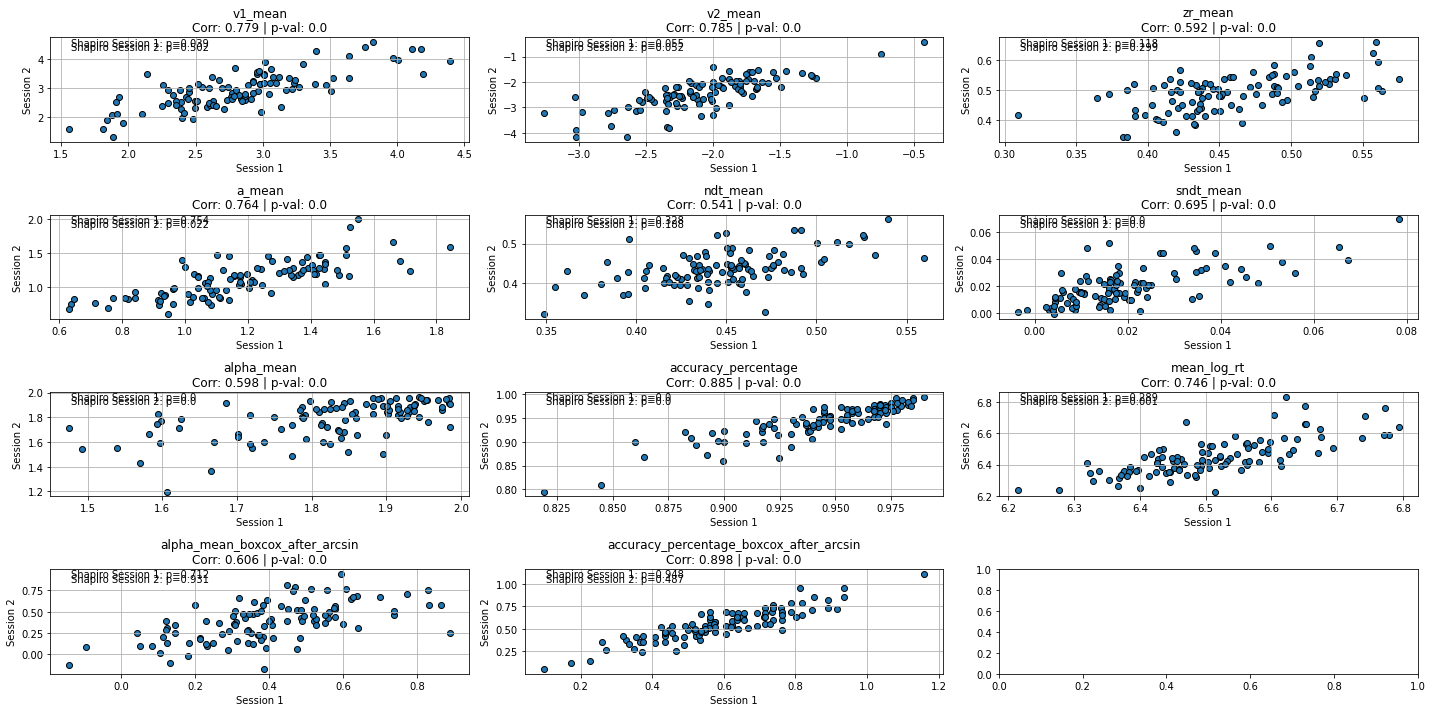

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, pearsonr, shapiro



# Prepare the figure for subplots
num_vars = len(columns_for_analysis)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Perform analysis for each variable and plot
for i, col in enumerate(columns_for_analysis):
    # Identify and remove outliers
    outlier_indices = identify_outliers([col], ldt_session_1_data, ldt_session_2_data)[col]
    clean_data = pd.concat([
        ldt_session_1_data.set_index('ID')[col],
        ldt_session_2_data.set_index('ID')[col]
    ], axis=1).drop(outlier_indices)
    
    # Calculate Pearson correlation
    correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
    
    # Test for normality
    _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
    _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
    
    # Round the results to three decimals
    correlation = round(correlation, 3)
    p_value_corr = round(p_value_corr, 3)
    p_value_shapiro_1 = round(p_value_shapiro_1, 3)
    p_value_shapiro_2 = round(p_value_shapiro_2, 3)
    
    # Plotting on the subplot
    ax = axes[i]
    ax.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
    ax.set_title(f'{col}\nCorr: {correlation} | p-val: {p_value_corr}')
    ax.set_xlabel('Session 1')
    ax.set_ylabel('Session 2')
    ax.grid(True)
    
    # Annotate with Shapiro-Wilk test results
    ax.annotate(f'Shapiro Session 1: p={p_value_shapiro_1}', xy=(0.05, 0.92), xycoords='axes fraction')
    ax.annotate(f'Shapiro Session 2: p={p_value_shapiro_2}', xy=(0.05, 0.88), xycoords='axes fraction')

# Adjust layout for readability
plt.tight_layout()

# Save the figure
#plt.savefig('combined_correlation_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


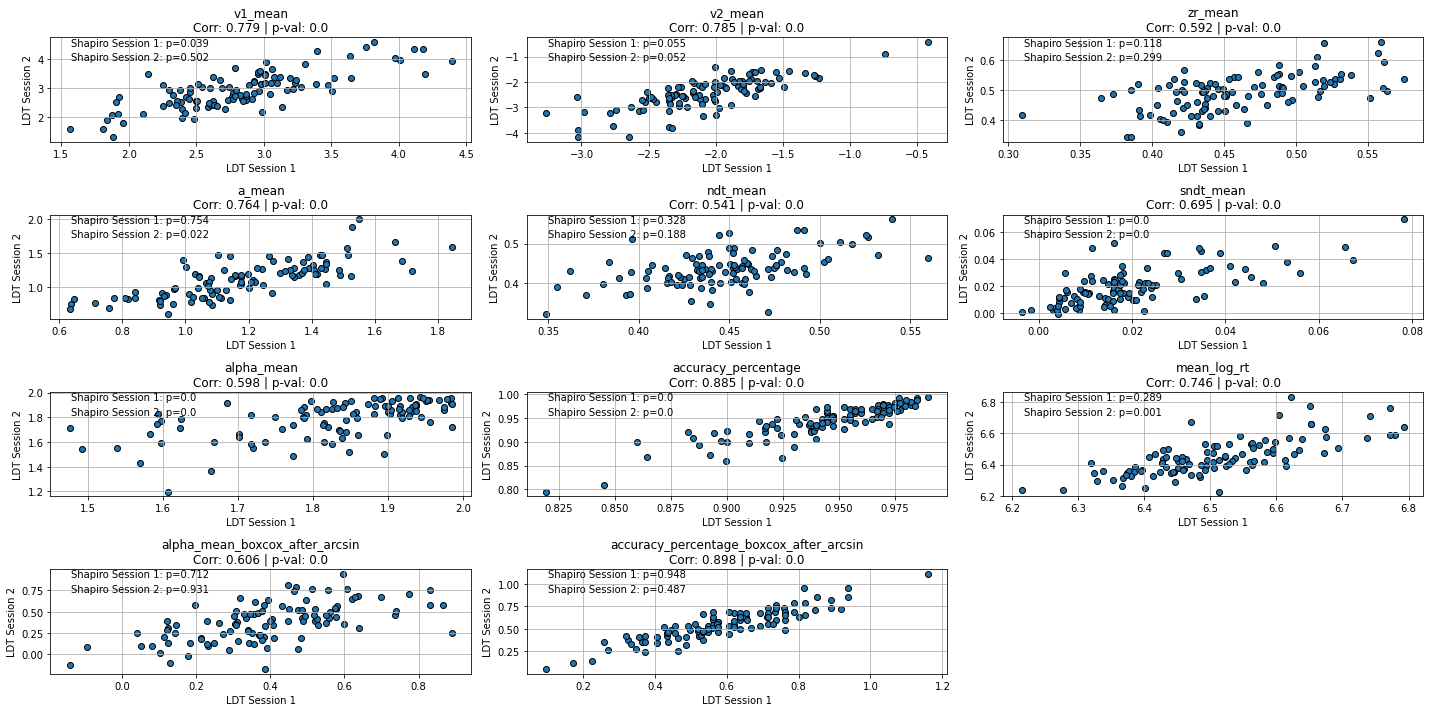

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, pearsonr, shapiro



# Prepare the figure for subplots
num_vars = len(columns_for_analysis)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Perform analysis for each variable and plot
for i, col in enumerate(columns_for_analysis):
    # Identify and remove outliers
    outlier_indices = identify_outliers([col], ldt_session_1_data, ldt_session_2_data)[col]
    clean_data = pd.concat([
        ldt_session_1_data.set_index('ID')[col],
        ldt_session_2_data.set_index('ID')[col]
    ], axis=1).drop(outlier_indices)
    
    # Calculate Pearson correlation
    correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
    
    # Test for normality
    _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
    _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
    
    # Round the results to three decimals
    correlation = round(correlation, 3)
    p_value_corr = round(p_value_corr, 3)
    p_value_shapiro_1 = round(p_value_shapiro_1, 3)
    p_value_shapiro_2 = round(p_value_shapiro_2, 3)
    
    # Plotting on the subplot
    ax = axes[i]
    ax.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
    ax.set_title(f'{col}\nCorr: {correlation} | p-val: {p_value_corr}')
    ax.set_xlabel('LDT Session 1')
    ax.set_ylabel('LDT Session 2')
    ax.grid(True)
    
    # Annotate with Shapiro-Wilk test results
    ax.annotate(f'Shapiro Session 1: p={p_value_shapiro_1}', xy=(0.05, 0.92), xycoords='axes fraction')
    ax.annotate(f'Shapiro Session 2: p={p_value_shapiro_2}', xy=(0.05, 0.78), xycoords='axes fraction')

for ax in axes[len(columns_for_analysis):]:
    ax.set_visible(False)

# Adjust layout for readability
plt.tight_layout()

# Save the figure
plt.savefig('LDT_Between_session_combined_correlation_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


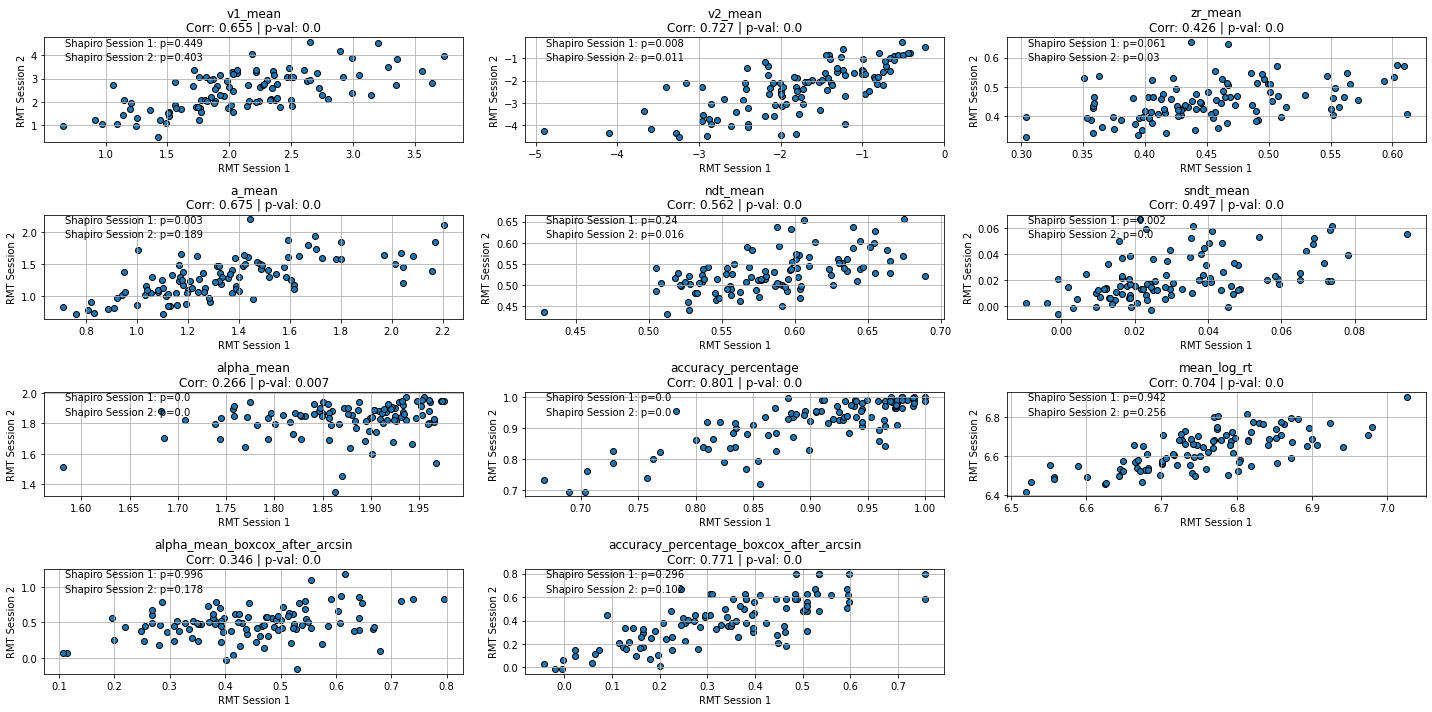

In [10]:
# Load the RMT Session 1 and Session 2 data
rmt_session_1_data = pd.read_csv('rmt_session_1_data_transformed.csv')
rmt_session_2_data = pd.read_csv('rmt_session_2_data_transformed.csv')

# Prepare the figure for subplots
num_vars = len(columns_for_analysis)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Perform analysis for each variable and plot
for i, col in enumerate(columns_for_analysis):
    # Identify and remove outliers
    outlier_indices = identify_outliers([col], rmt_session_1_data, rmt_session_2_data)[col]
    clean_data = pd.concat([
        rmt_session_1_data.set_index('ID')[col],
        rmt_session_2_data.set_index('ID')[col]
    ], axis=1).drop(outlier_indices)
    
    # Calculate Pearson correlation
    correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
    
    # Test for normality
    _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
    _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
    
    # Round the results to three decimals
    correlation = round(correlation, 3)
    p_value_corr = round(p_value_corr, 3)
    p_value_shapiro_1 = round(p_value_shapiro_1, 3)
    p_value_shapiro_2 = round(p_value_shapiro_2, 3)
    
    # Plotting on the subplot
    ax = axes[i]
    ax.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
    ax.set_title(f'{col}\nCorr: {correlation} | p-val: {p_value_corr}')
    ax.set_xlabel('RMT Session 1')
    ax.set_ylabel('RMT Session 2')
    ax.grid(True)
    
    # Annotate with Shapiro-Wilk test results
    ax.annotate(f'Shapiro Session 1: p={p_value_shapiro_1}', xy=(0.05, 0.92), xycoords='axes fraction')
    ax.annotate(f'Shapiro Session 2: p={p_value_shapiro_2}', xy=(0.05, 0.78), xycoords='axes fraction')

# Hide any unused subplots
for ax in axes[len(columns_for_analysis):]:
    ax.set_visible(False)

# Adjust layout for readability and save the figure
plt.tight_layout()
plt.savefig('RMT_Between_session_combined_correlation_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Makign Data Suitable for Across task correlation for session to LDT_Session_2 & RMT_Session_2

In [11]:
ldt_session_2_data = pd.read_csv('ldt_session_2_data_transformed.csv')
rmt_session_2_data = pd.read_csv('rmt_session_2_data_transformed.csv')
ldt_session_2_data

,Unnamed: 0,Experiment,v1_mean,v2_mean,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,accuracy_percentage,mean_log_rt,task,session,ID,alpha_mean_arcsin,alpha_mean_boxcox_after_arcsin,accuracy_percentage_arcsin,accuracy_percentage_boxcox_after_arcsin
0,1,1025_class_words_part_2.dat,4.019055,-3.225694,0.482205,0.988850,0.444956,0.005373,1.876056,0.977500,6.359827,LDT,part_2,1025,1.355578,0.491228,1.437785,0.736188
1,5,1018_class_words_part_2.dat,3.375108,-3.770381,0.516264,1.172946,0.394071,0.009270,1.815319,0.977500,6.319064,LDT,part_2,1018,1.290544,0.379477,1.437785,0.736188
2,9,015_class_words_part_2.dat,3.582979,-1.840499,0.389429,1.110621,0.446824,0.052014,1.486006,0.935000,6.472106,LDT,part_2,15,1.054113,0.056990,1.322695,0.476429
3,11,3010_class_words_part_2.dat,2.565053,-2.000000,0.451525,1.249733,0.470304,0.021404,1.700234,0.947500,6.583155,LDT,part_2,3010,1.194482,0.233246,1.350528,0.534298
4,16,4003_class_words_part_2.dat,2.925662,-2.038398,0.429936,1.467195,0.434420,0.001913,1.953712,0.977444,6.554706,LDT,part_2,4003,1.492595,0.762800,1.437570,0.735650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,389,4008_class_words_part_2.dat,2.555295,-1.974409,0.402158,1.075640,0.453316,0.014277,1.734336,0.935135,6.494156,LDT,part_2,4008,1.220602,0.270856,1.322981,0.477008
100,392,011_class_words_part_2.dat,3.341341,-3.715147,0.558832,0.965269,0.413077,0.024563,1.826148,0.965000,6.298818,LDT,part_2,11,1.301084,0.396872,1.396272,0.636162
101,398,1001_class_words_part_2.dat,2.610477,-2.530360,0.546326,1.272718,0.376323,0.020320,1.635579,0.952500,6.413176,LDT,part_2,1001,1.148550,0.170863,1.362623,0.560404
102,403,019_class_words_part_2.dat,2.094644,-1.611080,0.459922,1.259707,0.388263,0.011289,1.851307,0.923077,6.502204,LDT,part_2,19,1.327148,0.441069,1.298589,0.428730


In [13]:
ldt_session_2_data=ldt_session_2_data.sort_values(by=['ID'], ascending=False)
rmt_session_2_data=rmt_session_2_data.sort_values(by=['ID'], ascending=False)
ldt_session_2_data=ldt_session_2_data[ldt_session_2_data['ID'].isin(rmt_session_2_data['ID'])]

# Across task correlation for session to LDT_Session_2 & RMT_Session_2

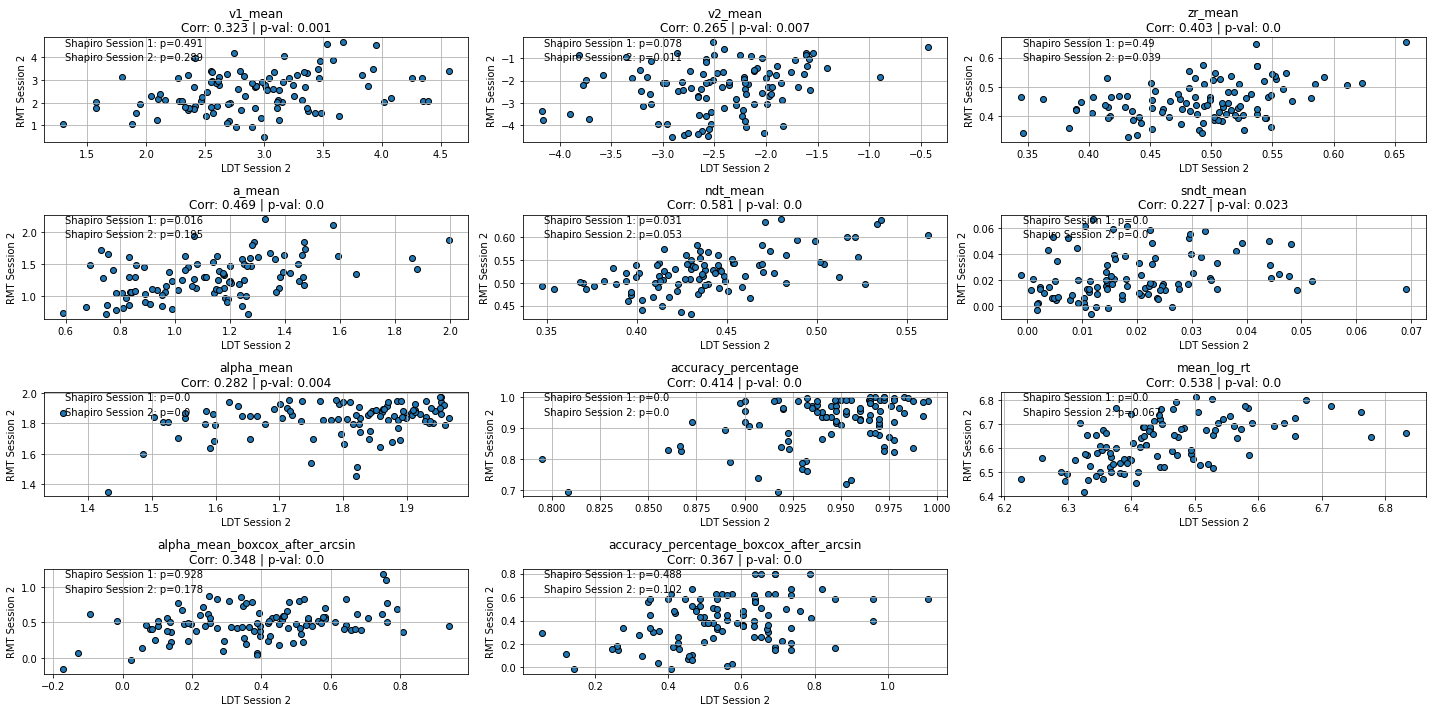

In [14]:

# Prepare the figure for subplots
num_vars = len(columns_for_analysis)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Perform analysis for each variable and plot
for i, col in enumerate(columns_for_analysis):
    # Identify and remove outliers
    outlier_indices = identify_outliers([col], ldt_session_2_data, rmt_session_2_data)[col]
    clean_data = pd.concat([
        ldt_session_2_data.set_index('ID')[col],
        rmt_session_2_data.set_index('ID')[col]
    ], axis=1).drop(outlier_indices)
    
    # Calculate Pearson correlation
    correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
    
    # Test for normality
    _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
    _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
    
    # Round the results to three decimals
    correlation = round(correlation, 3)
    p_value_corr = round(p_value_corr, 3)
    p_value_shapiro_1 = round(p_value_shapiro_1, 3)
    p_value_shapiro_2 = round(p_value_shapiro_2, 3)
    
    # Plotting on the subplot
    ax = axes[i]
    ax.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
    ax.set_title(f'{col}\nCorr: {correlation} | p-val: {p_value_corr}')
    ax.set_xlabel('LDT Session 2')
    ax.set_ylabel('RMT Session 2')
    ax.grid(True)
    
    # Annotate with Shapiro-Wilk test results
    ax.annotate(f'Shapiro Session 1: p={p_value_shapiro_1}', xy=(0.05, 0.92), xycoords='axes fraction')
    ax.annotate(f'Shapiro Session 2: p={p_value_shapiro_2}', xy=(0.05, 0.78), xycoords='axes fraction')

# Hide any unused subplots
for ax in axes[len(columns_for_analysis):]:
    ax.set_visible(False)

# Adjust layout for readability and save the figure
plt.tight_layout()
plt.savefig('Across_Task_Session_2_combined_correlation_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Across Task Session 1 Making data suitable 

In [18]:
ldt_session_1_data = pd.read_csv('ldt_session_1_data_transformed.csv')
rmt_session_1_data = pd.read_csv('rmt_session_1_data_transformed.csv')
ldt_session_1_data

,Unnamed: 0,Experiment,v1_mean,v2_mean,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,accuracy_percentage,mean_log_rt,task,session,ID,alpha_mean_arcsin,alpha_mean_boxcox_after_arcsin,accuracy_percentage_arcsin,accuracy_percentage_boxcox_after_arcsin
0,0,3024_class_words_part_1.dat,2.713818,-1.929785,0.516543,1.265116,0.491621,0.018093,1.930676,0.944862,6.604221,LDT,part_1,3024,1.403768,0.557944,1.355729,0.561120
1,12,2005_class_words_part_1.dat,2.294848,-1.882733,0.480014,1.141956,0.515544,0.034769,1.844658,0.924812,6.614017,LDT,part_1,2005,1.301154,0.385059,1.311383,0.465175
2,14,1027_class_words_part_1.dat,3.759410,-4.684975,0.465659,1.512855,0.348644,0.004065,1.624799,0.985000,6.277150,LDT,part_1,1027,1.130450,0.145603,1.500027,0.936727
3,15,1006_class_words_part_1.dat,2.772143,-2.324983,0.575205,0.817880,0.526453,0.050540,1.900512,0.900000,6.495195,LDT,part_1,1006,1.362331,0.485400,1.264599,0.372955
4,20,4004_class_words_part_1.dat,3.273054,-2.231810,0.364242,1.129546,0.405275,0.021561,1.859360,0.955000,6.385288,LDT,part_1,4004,1.315941,0.408585,1.381778,0.621548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,395,1020_class_words_part_1.dat,3.133874,-2.014913,0.385272,1.444093,0.453795,0.009787,1.895326,0.972500,6.566669,LDT,part_1,1020,1.355973,0.474600,1.437637,0.761814
100,397,1002_class_words_part_1.dat,2.141323,-2.545402,0.445982,1.869557,0.396219,0.010404,1.899358,0.979950,6.651069,LDT,part_1,1002,1.360901,0.482963,1.470121,0.850398
101,404,1008_class_words_part_1.dat,2.450375,-1.694586,0.490311,1.715576,0.500368,0.004333,1.975318,0.968992,6.771410,LDT,part_1,1008,1.498924,0.739023,1.424778,0.728197
102,406,015_class_words_part_1.dat,2.970756,-1.936086,0.432318,1.143094,0.452581,0.016081,1.773389,0.939850,6.503353,LDT,part_1,15,1.237788,0.289374,1.343890,0.534667


In [19]:
ldt_session_1_data=ldt_session_1_data.sort_values(by=['ID'], ascending=False)
rmt_session_1_data=rmt_session_1_data.sort_values(by=['ID'], ascending=False)
ldt_session_1_data=ldt_session_1_data[ldt_session_1_data['ID'].isin(rmt_session_1_data['ID'])]

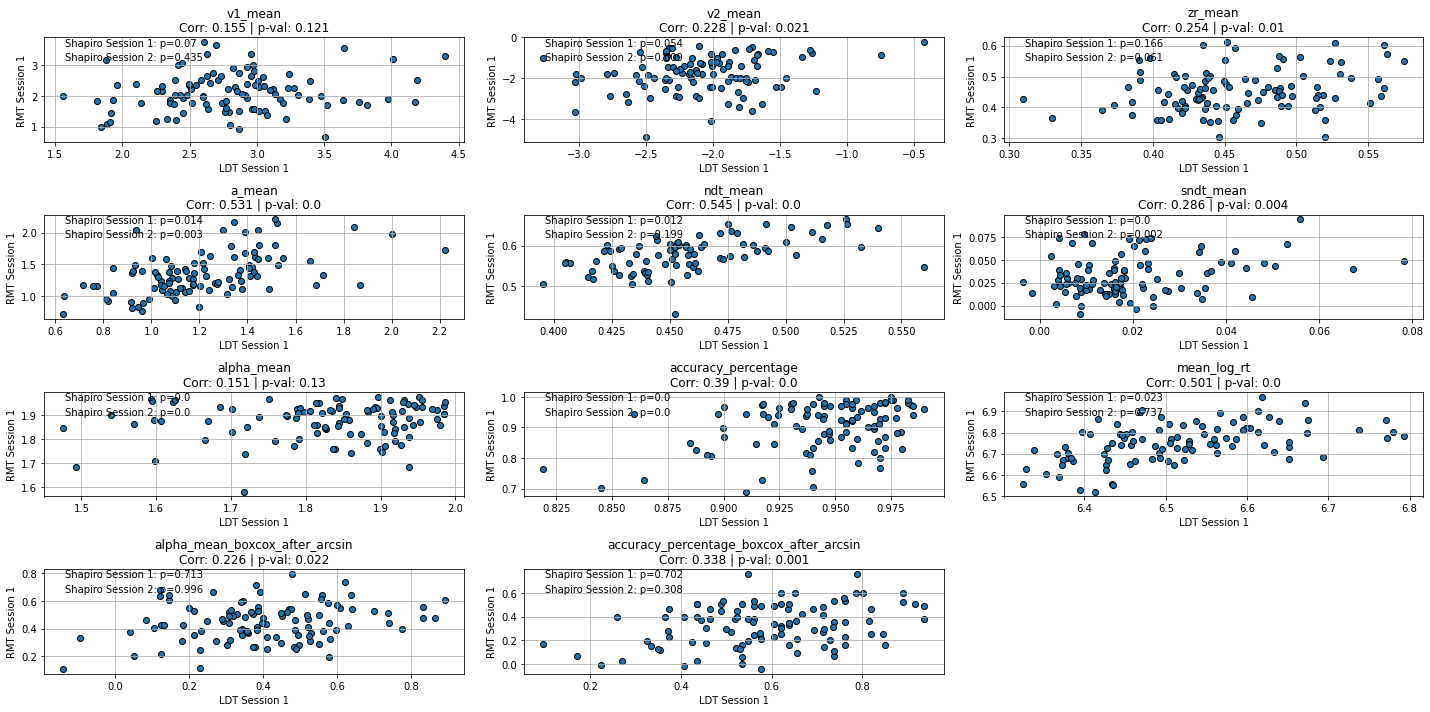

In [20]:

# Prepare the figure for subplots
num_vars = len(columns_for_analysis)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Perform analysis for each variable and plot
for i, col in enumerate(columns_for_analysis):
    # Identify and remove outliers
    outlier_indices = identify_outliers([col], ldt_session_1_data, rmt_session_1_data)[col]
    clean_data = pd.concat([
        ldt_session_1_data.set_index('ID')[col],
        rmt_session_1_data.set_index('ID')[col]
    ], axis=1).drop(outlier_indices)
    
    # Calculate Pearson correlation
    correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
    
    # Test for normality
    _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
    _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
    
    # Round the results to three decimals
    correlation = round(correlation, 3)
    p_value_corr = round(p_value_corr, 3)
    p_value_shapiro_1 = round(p_value_shapiro_1, 3)
    p_value_shapiro_2 = round(p_value_shapiro_2, 3)
    
    # Plotting on the subplot
    ax = axes[i]
    ax.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
    ax.set_title(f'{col}\nCorr: {correlation} | p-val: {p_value_corr}')
    ax.set_xlabel('LDT Session 1')
    ax.set_ylabel('RMT Session 1')
    ax.grid(True)
    
    # Annotate with Shapiro-Wilk test results
    ax.annotate(f'Shapiro Session 1: p={p_value_shapiro_1}', xy=(0.05, 0.92), xycoords='axes fraction')
    ax.annotate(f'Shapiro Session 2: p={p_value_shapiro_2}', xy=(0.05, 0.78), xycoords='axes fraction')

# Hide any unused subplots
for ax in axes[len(columns_for_analysis):]:
    ax.set_visible(False)

# Adjust layout for readability and save the figure
plt.tight_layout()
plt.savefig('Across_Task_Session_1_combined_correlation_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
